# Name :- Gaurav R. Bhasme
## Project Name :- Stock Market Prediction And Forecasting Using Stacked LSTM (LGM task-1.2)
#### Hey in this project I did the analysis of share price of TATAGLOBAL dataset using python. In this project I analyzed the share price and predict the chart for next 30 days

### Importing the essential libraries

In [1]:
import numpy as np
from numpy import array
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

### Loading the dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


### Inverting the data so that we can get it from begining

In [18]:
tata=df.sort_values(by=['Date']).reset_index()
tata=tata.drop(['index'],axis=1)
tata.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
tata.describe()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,1017.000000,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,587.598219,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,0.000000,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,508.500000,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,1017.000000,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,1525.500000,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2034.000000,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [12]:
tata.shape

(2035, 9)

### Data Cleansing

In [14]:
tata.isnull()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False,False


In [16]:
tata.isnull().sum()

index                   0
Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [19]:
tata_1=tata.reset_index()['Close']

In [21]:
tata_1.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

Text(0, 0.5, 'Sahre Price')

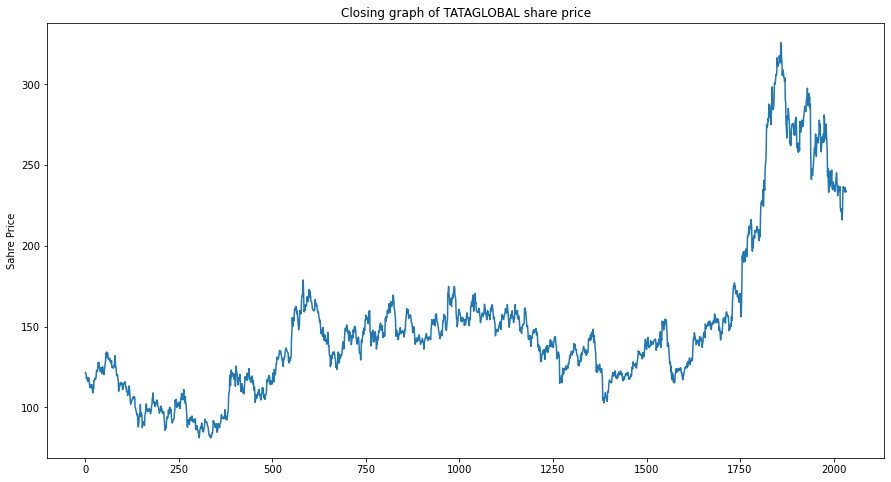

In [22]:
plt.figure(figsize=(15,8))
plt.plot(tata_1)
plt.title('Closing graph of TATAGLOBAL share price')
plt.ylabel('Sahre Price')

## _This Graph shows the share price of TATAGLOBAL_

#### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
tata_1=scaler.fit_transform(np.array(tata_1).reshape(-1,1))

In [24]:
tata_1.shape

(2035, 1)

In [25]:
tata_1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## splitting dataset into train and test split

In [27]:
training_size=int(len(tata_1)*0.65)
test_size=len(tata_1)-training_size
train_data,test_data=tata_1[0:training_size,:],tata_1[training_size:len(tata_1),:1]

#### convert an array of values into a dataset matrix

In [28]:
import numpy as np
def create_dataset(dataset,time_step=1):
    data_x,data_y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return np.array(data_x),np.array(data_y)

In [29]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [30]:
print(x_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.19669118 0.19505719 0.20996732 ... 0.20751634 0.20751634 0.19219771]
 [0.19505719 0.20996732 0.21098856 ... 0.20751634 0.19219771 0.18341503]
 [0.20996732 0.21098856 0.21568627 ... 0.19219771 0.18341503 0.19546569]]


### Reshape input to be [samples, time steps, features] which is required for LSTM

In [31]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

### Create the Stacked LSTM model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 312ms/step - loss: 0.0103 - val_loss: 0.0171
Epoch 2/100
20/20 [==============================] - 5s 229ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 3/100
20/20 [==============================] - 5s 233ms/step - loss: 9.2316e-04 - val_loss: 0.0041
Epoch 4/100
20/20 [==============================] - 5s 232ms/step - loss: 8.3746e-04 - val_loss: 0.0047
Epoch 5/100
20/20 [==============================] - 5s 228ms/step - loss: 8.1198e-04 - val_loss: 0.0026
Epoch 6/100
20/20 [==============================] - 5s 231ms/step - loss: 8.2878e-04 - val_loss: 0.0037
Epoch 7/100
20/20 [==============================] - 5s 233ms/step - loss: 7.5560e-04 - val_loss: 0.0022
Epoch 8/100
20/20 [==============================] - 4s 225ms/step - loss: 8.8430e-04 - val_loss: 0.0027
Epoch 9/100
20/20 [==============================] - 5s 235ms/step - loss: 7.7237e-04 - val_loss: 0.0027
Epoch 10/100
20/20 [==============================] - 5s 230ms

Epoch 78/100
20/20 [==============================] - 4s 215ms/step - loss: 1.9980e-04 - val_loss: 6.3078e-04
Epoch 79/100
20/20 [==============================] - 4s 218ms/step - loss: 1.5547e-04 - val_loss: 0.0011
Epoch 80/100
20/20 [==============================] - 4s 223ms/step - loss: 1.4455e-04 - val_loss: 4.5618e-04
Epoch 81/100
20/20 [==============================] - 4s 220ms/step - loss: 1.6805e-04 - val_loss: 7.2837e-04
Epoch 82/100
20/20 [==============================] - 4s 215ms/step - loss: 1.3853e-04 - val_loss: 0.0011
Epoch 83/100
20/20 [==============================] - 4s 222ms/step - loss: 1.3689e-04 - val_loss: 7.6734e-04
Epoch 84/100
20/20 [==============================] - 4s 220ms/step - loss: 1.3860e-04 - val_loss: 0.0016
Epoch 85/100
20/20 [==============================] - 4s 221ms/step - loss: 1.6087e-04 - val_loss: 8.2604e-04
Epoch 86/100
20/20 [==============================] - 4s 224ms/step - loss: 1.3623e-04 - val_loss: 0.0011
Epoch 87/100
20/20 [======

### Lets Do the prediction and check performance metrics

In [37]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

### Transformback to original form

In [38]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics

In [39]:
math.sqrt(mean_squared_error(y_train,train_predict))

133.04446830612244

### Test Data RMSE

In [40]:
math.sqrt(mean_squared_error(y_test,test_predict))

193.82175887853145

### Plotting 

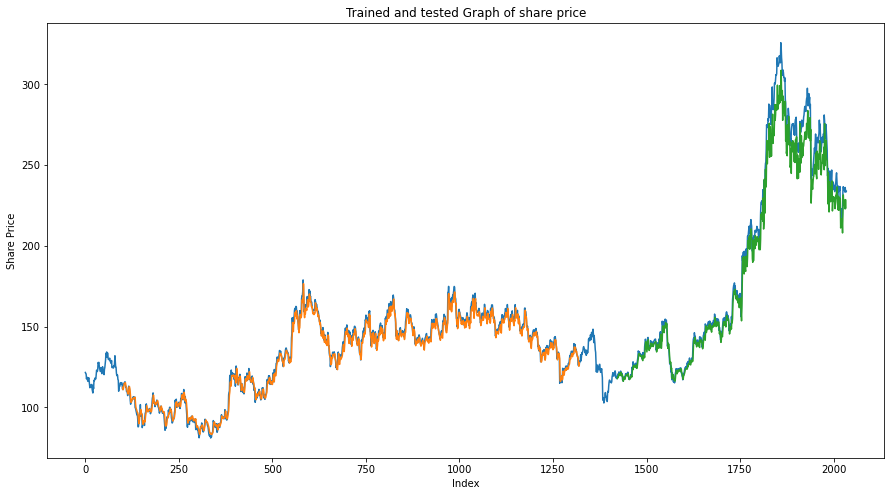

In [47]:
# shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(tata_1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

# shift test predictions for plotting
testPredictPlot=np.empty_like(tata_1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(tata_1)-1,:]=test_predict

# plot baseline and predictions
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(tata_1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Trained and tested Graph of share price')
plt.xlabel('Index')
plt.ylabel('Share Price')
plt.show()

#### Here Orange Line shows the Trained model and the green line shos the tested 

In [48]:
len(test_data)-100

613

In [49]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} dayy output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.5929559]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

10 dayy output [[0.3875023]]
11 day input [0.69138072 0.70894608 0.72263072 0.73406863 0.72120098 0.74979575
 0.7689951  0.74468954 0.7120098  0.74673203 0.75490196 0.76041667
 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575
 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575
 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771
 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608
 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157
 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588
 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935
 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974 0.63623366
 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484
 0.57883987 0.625      0.63582516 0.62949346 0.62888072 0.62765523
 0.62234477 0.633782

20 dayy output [[0.3219183]]
21 day input [0.75490196 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908
 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046
 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784
 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869 0.79370915
 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549 0.62214052
 0.62418301 0.59295589 0.54230708 0.49291074 0.46425107 0.44371483
 0.42549714 0.411540

29 dayy output [[0.27546114]]
[[0.5929558873176575], [0.5423070788383484], [0.4929107427597046], [0.4642510712146759], [0.44371482729911804], [0.4254971444606781], [0.4115407168865204], [0.40239179134368896], [0.39633622765541077], [0.3916977643966675], [0.3875023126602173], [0.3831567168235779], [0.3782610595226288], [0.3726103603839874], [0.3661920130252838], [0.3591364622116089], [0.35165563225746155], [0.343988835811615], [0.3363623321056366], [0.3289618194103241], [0.3219183087348938], [0.3153059482574463], [0.30914825201034546], [0.3034293055534363], [0.2981066405773163], [0.29312363266944885], [0.2884199917316437], [0.28393882513046265], [0.279631644487381], [0.2754611372947693]]


In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
len(tata_1)

2035

In [60]:
tata_3=tata_1.tolist()
tata_3.extend(lst_output)

Text(0, 0.5, 'Share Price')

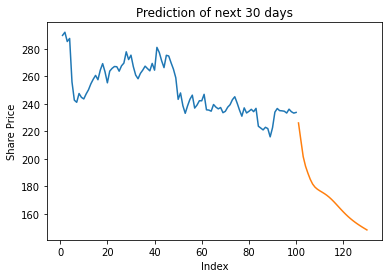

In [66]:
plt.plot(day_new,scaler.inverse_transform(tata_1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Prediction of next 30 days')
plt.xlabel('Index')
plt.ylabel('Share Price')

### In this graph Orange line shows the predicted share price for next 30 days


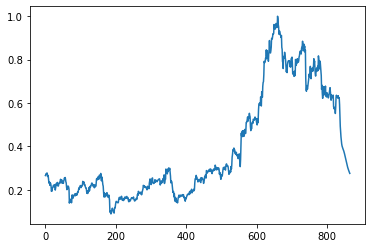

In [62]:
plt.plot(tata_3[1200:])

In [64]:
tata_3=scaler.inverse_transform(tata_3).tolist()

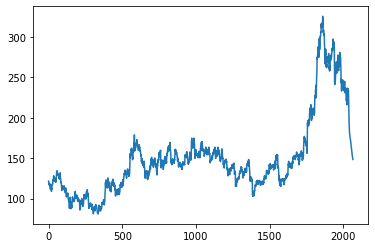

In [65]:
plt.plot(tata_3)

# Thank you so much